In [1]:
import sys
import os
import pandas as pd
import numpy as np


# For creating cool charts :)
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib as mpl
from dateutil.relativedelta import relativedelta
from highlight_text import ax_text

# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [3]:
# Load the Comfortaa style

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

In [9]:
payload =  {
    "type": "data_table",
    "operation": "sum",
    "language": "en",
    "group_by": [
        "economic_activity"
    ],
    "categories": {
        "economic_activity": [
            "457155464609a2f",
            "faa2a8d0af8a72c",
            "1d0185629b65ee3",
            "e426cc87d0540ab",
            "29daaeb36fea1ab",
            "d35f5b82779e7d5",
            "3726993cc9fecab",
            "4adeefc3d481a07",
            "a07267f78158c2c",
            "feb7bb4445c808d"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_emoe",
            "variables": [
                "1b0f1ce9956876e"
            ]
        }
    ],
    "from": "2017-01-01"
}

response = get_tukan_api_request(payload)
data = response["data"]

Success getting the data


In [32]:
data[["economic_activity","economic_activity__ref"]].drop_duplicates()

,economic_activity,economic_activity__ref
0,Comercio,1d0185629b65ee3
1,Otros,29daaeb36fea1ab
2,Servicios de apoyo a los negocios y manejo de ...,3726993cc9fecab
3,Construcción,457155464609a2f
4,Servicios privados no financieros,4adeefc3d481a07
5,"Servicios profesionales, científicos y técnicos",a07267f78158c2c
6,Servicios de alojamiento temporal y de prepara...,d35f5b82779e7d5
7,Información en medios masivos,e426cc87d0540ab
8,Industrias manufactureras,faa2a8d0af8a72c
9,"Transportes, correos y almacenamiento",feb7bb4445c808d


In [10]:
language = "en"

In [11]:
if language == "es":
    data.replace({"economic_activity":{
        "Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación": "Serv. de apoyo y manejo de residuos",
        "Servicios de alojamiento temporal y de preparación de alimentos y bebidas": "Hoteles y restaurantes",
        "Servicios profesionales, científicos y técnicos": "Serv. profesionales y técnicos"}}, inplace = True)
else:
    data.replace({"economic_activity":{
        "Administrative and support and waste management and remediation services": "Admin. & waste management services",
        "Professional, scientific, and technical services": "Professional & technical services"}}, inplace = True)
sort_categories = data[data["date"] == data["date"].max()].copy()
sort_categories = sort_categories.sort_values(by = "1b0f1ce9956876e", ascending = False)

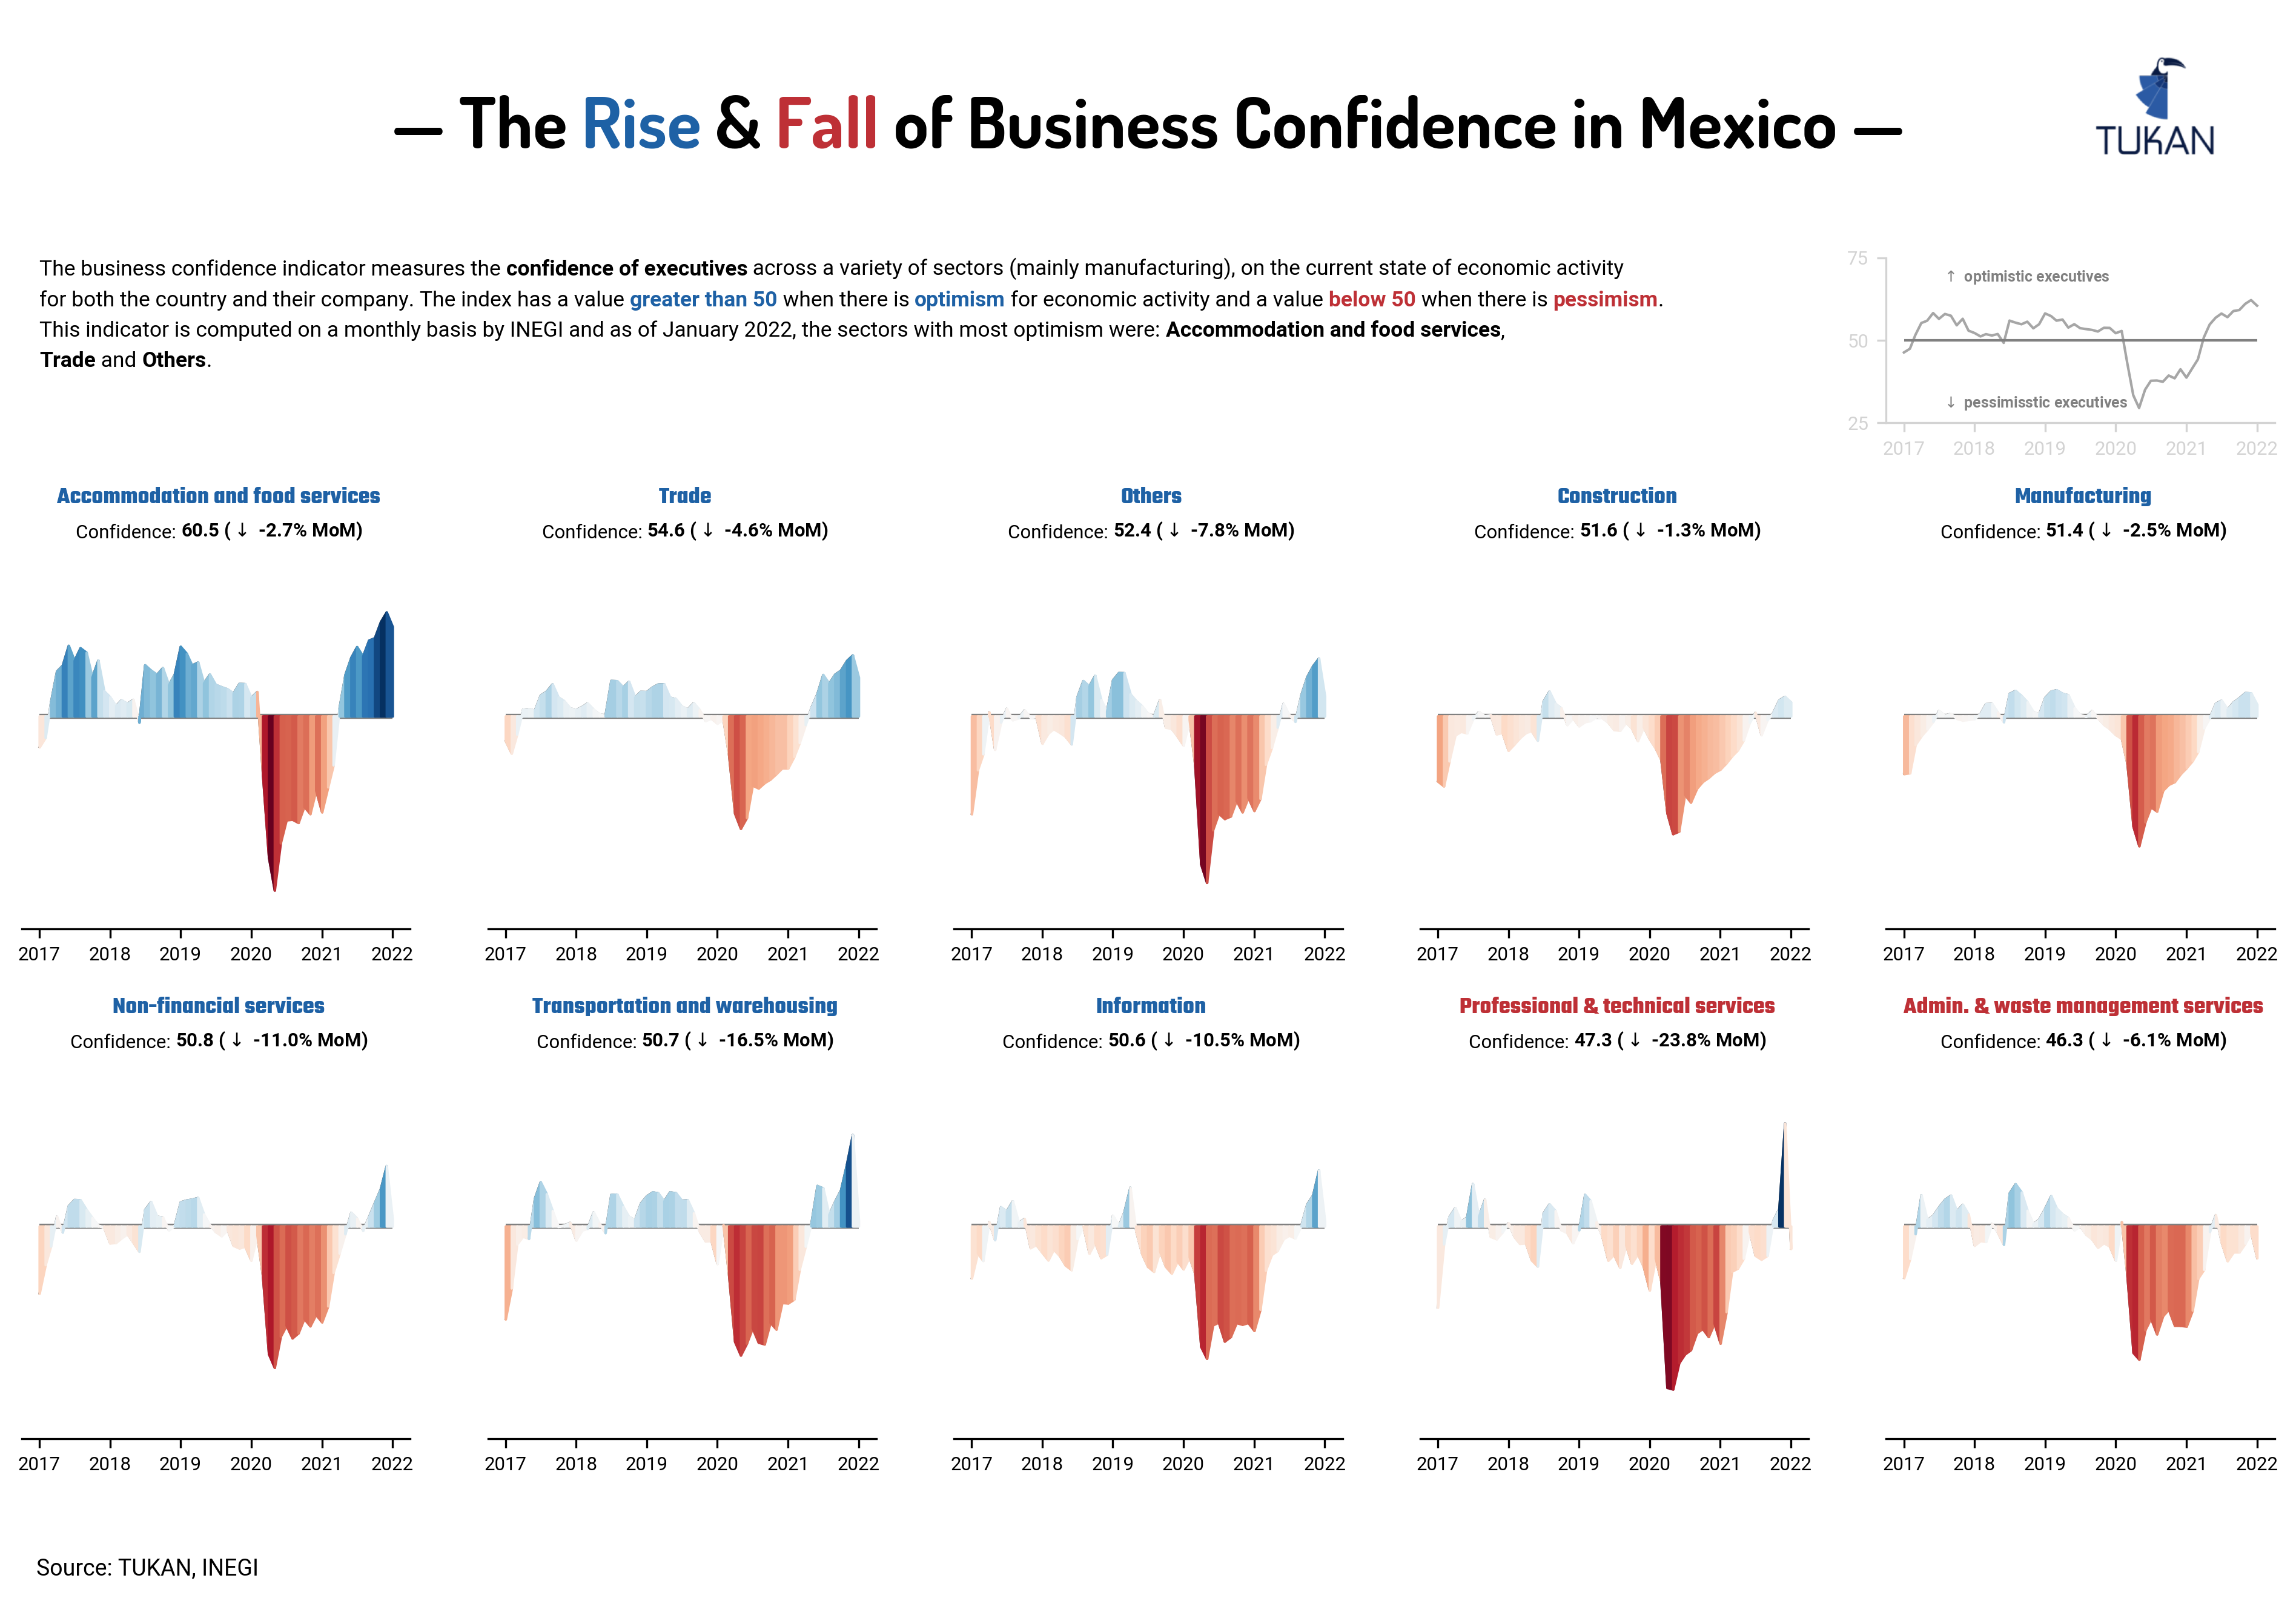

In [14]:
# Economic activities
sectors = sort_categories["economic_activity"]

# Description text
s_1 = sectors.iloc[0]
s_2 = sectors.iloc[1]
s_3 = sectors.iloc[2]


if language == "es":
    title = f"— Las <Alzas> y <Bajas> de la Confianza Empresarial en México —"
    source_text = "Fuente: TUKAN, INEGI"
    subtitle = f"El indicador de confianza empresarial mide el <optimismo de los empresarios> a través de varios sectores, respecto al estado actual de la actividad económica \ntanto del país como de su propia empresa. El índice tiene un valor <mayor a 50> cuando se tiene <optimismo> y un valor <menor a 50> cuando se tiene <pesimismo>.\nEste indicador es calculado de forma mensual por el INEGI y al mes de enero del 2022, los sectores con mayor optimismo fueron: <{s_1}>,\n<{s_2}> and <{s_3}>."
    alt_text_1 = r"$\uparrow$ empresarios optimistas"
    alt_text_2 = r"$\downarrow$ empresarios pesimistas"
    confidence_text = "Confianza"
else:
    title = f"— The <Rise> & <Fall> of Business Confidence in Mexico —"
    source_text = "Source: TUKAN, INEGI"
    subtitle = f"The business confidence indicator measures the <confidence of executives> across a variety of sectors (mainly manufacturing), on the current state of economic activity \nfor both the country and their company. The index has a value <greater than 50> when there is <optimism> for economic activity and a value <below 50> when there is <pessimism>.\nThis indicator is computed on a monthly basis by INEGI and as of January 2022, the sectors with most optimism were: <{s_1}>,\n<{s_2}> and <{s_3}>."
    alt_text_1 = r"$\uparrow$ optimistic executives"
    alt_text_2 = r"$\downarrow$ pessimisstic executives"
    confidence_text = "Confidence"

fig = plt.figure(figsize=(16,10), dpi = 300, facecolor="white")
outer_gspec = mpl.gridspec.GridSpec(
    ncols = 5, nrows = 3, height_ratios = [0.1, .15, .85], figure = fig
)

title_spec = mpl.gridspec.GridSpecFromSubplotSpec(ncols = 1, nrows = 1, subplot_spec=outer_gspec[0,:])
desc_spec = mpl.gridspec.GridSpecFromSubplotSpec(ncols = 5, nrows = 1, subplot_spec=outer_gspec[1,:])
gspec = mpl.gridspec.GridSpecFromSubplotSpec(ncols = 5, nrows = 2, subplot_spec=outer_gspec[2,:])


# Global parameters
X_min = data["date"].min()
X_max = data["date"].max()
center_date = X_min + ((X_max + relativedelta(months=1)) - X_min)/2

# Select the color map:
cmap = mpl.cm.RdBu
normalize = mpl.colors.TwoSlopeNorm(vmin=data["1b0f1ce9956876e"].min(), vmax=data["1b0f1ce9956876e"].max(), vcenter = 50)


aux_count = 0
for i in range(2):
    for j in range(5):
        aux_df = data[data["economic_activity"] == sectors.iloc[aux_count]]
        ax = plt.subplot(gspec[i,j])
        ax.plot(aux_df["date"], aux_df["1b0f1ce9956876e"], color = "black", alpha = 0.7, lw = 0.75)
        ax.hlines(50, xmin = X_min, xmax = X_max, color = "gray", zorder = 3, lw = 2)

        # Ax setup
        ax.spines["left"].set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plot the cmap
        X = aux_df["date"]
        Y = aux_df["1b0f1ce9956876e"]
        for index in range(len(X) - 1):
            ax.fill_between([X.iloc[index], X.iloc[index+1]], [Y.iloc[index], Y.iloc[index+1]], [50, 50], color=cmap(normalize(Y.iloc[index+1])), zorder = 3)

        ax.set_ylim(25,75)

        sector = sectors.iloc[aux_count]

        if Y.iloc[index + 1] >= 50:
            color = cmap(normalize(60))
        else:
            color = cmap(normalize(35))

        if Y.iloc[index + 1]/Y.iloc[index] - 1>= 0:
            arrow_text = r"$\uparrow$"
        else:
            arrow_text = r"$\downarrow$"

        ax_text(x = center_date, y = 77,
            s = f"<{sector}>",
            highlight_textprops=[{"color": color, "size":9.5}], 
                                ax = ax, weight = "bold", font = "Teko", ha = "center")
        ax_text(x = center_date, y = 73,
            s = f"<{confidence_text}: ><{round(Y.iloc[index+1],1)} ({arrow_text} {Y.iloc[index + 1]/Y.iloc[index] - 1:.1%} MoM)>",
            highlight_textprops=[{"color": "black", "size":7.5}, 
                                {"color":"black", "size":7.5, "weight":"bold"}], 
                                ax = ax, weight = "normal", font = "Roboto", ha = "center")
        
        for label in ax.get_xticklabels():
            label.set_fontsize(7.5)

        ax.grid(False)
        aux_count += 1
        

# Ax for title
ax_title = plt.subplot(title_spec[0])

ax_text(x = 0.5, y = 0.75,
    s = title,
    highlight_textprops=[{"color": cmap(normalize(60))},{"color": cmap(normalize(35))}], 
                        ax = ax_title, weight = "bold", font = "Dosis", ha = "center", size = 28)

ax_title.axis("off")

# Logo and source text

fig.text(0.13, 0.05, source_text, fontsize=9)


tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.8, .81, 0.09, 0.097], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")


ax_desc = plt.subplot(desc_spec[0,:4])
ax_text(x = 0.01, y = 1,
    s = subtitle,
    highlight_textprops = [{"weight":"bold"}, {"weight": "bold", "color": cmap(normalize(60))}, {"weight": "bold", "color": cmap(normalize(60))},
    {"weight": "bold", "color": cmap(normalize(35))}, {"weight": "bold", "color": cmap(normalize(35))}, {"weight":"bold"}, {"weight":"bold"}, {"weight":"bold"}],
    ax = ax_desc, font = "Roboto", ha = "left", va = "top", size = 8.5)
ax_desc.axis("off")

# Legend ax
ax_legend = plt.subplot(desc_spec[0,4])
aux_df = data[data["economic_activity__ref"] == "d35f5b82779e7d5"]
ax_legend.plot(aux_df["date"], aux_df["1b0f1ce9956876e"], color = "gray", alpha = 0.7, lw = 1)
ax_legend.hlines(50, xmin = X_min, xmax = X_max, color = "gray", zorder = 3, lw = 1)
ax_legend.set_ylim(25,75)
ax_legend.grid(False)
ax_legend.spines["left"].set_visible(True)
ax_legend.get_yaxis().set_visible(True)
ax_legend.set_yticks([25,50,75])
for label in ax_legend.get_xticklabels():
    label.set_fontsize(7.5)
    label.set_color("gray")
for label in ax_legend.get_yticklabels():
    label.set_fontsize(7.5)
    label.set_color("gray")
ax_legend.spines['bottom'].set_color('lightgray')
ax_legend.spines['left'].set_color('lightgray')
ax_legend.tick_params(axis='both', colors='lightgray')

ax_legend.annotate(
    alt_text_1,
    xy=(X_min,50),
    xycoords="data",
    xytext=(15, 25),
    textcoords="offset points",
    color="gray",
    size=6,
    va="center",
    ha="left",
    weight="bold",
)
ax_legend.annotate(
    alt_text_2,
    xy=(X_min,50),
    xycoords="data",
    xytext=(15, -25),
    textcoords="offset points",
    color="gray",
    size=6,
    va="center",
    ha="left",
    weight="bold",
)

plt.savefig(
    "emoe_viz.png",
    dpi=500,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)